1. Install and Import Dependencies (on anaconda)

- Python 3.10 (on my project's environment)
- PyTorch (CPU version, for my AMD laptop) and install the code given
After this two set ups:
- Yolov5 Repository: https://github.com/ultralytics/yolov5.
git (Download zip) and:
pip install -r requirements.txt 

- import torch

2. Loading the Model

In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom') # standard

3. Customize my model

- define my yaml file:

path: data 
train: C:\Armazenamento\yolov5-master\data\images 
val: C:\Armazenamento\yolov5-master\data\images
-> test:  test images (optional)
number of classes
nc: 1
names: ["Finding"]

IMAGES_PATH = os.path.join('C:\Armazenamento\yolov5-master\data','img','00_032158.png')
labels = ['finfing']
number_imgs = approx. 900

4. Train my model on my custom data:

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Armazenamento/yolov5-master/runs/train/exp36/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\adris/.cache\torch\hub\master.zip
YOLOv5  2023-12-8 Python-3.10.13 torch-2.1.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
# My best run was:
# 150 epochs, 300 images of disease and 30 for background. 550 minutes
!python train.py --img 640 --batch 16 --epochs 150 --data dataset.yml --weights yolov5s.pt

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2023-11-28 Python-3.10.13 torch-2.1.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5  runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs\train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=1

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  models.common.C3                        [512, 512, 1]                 
  9                -1  1    656896  models.common.SPPF                      [512, 512, 5]                 
 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 12           [-1, 6]  1         0  models.common.Concat                    [1]                           
 13                -1  1    361984  models.common.C3                        [512, 256, 1, False]          
 14                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 15                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
...
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 11/11 [00:53<00:00,  4.11s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 11/11 [00:53<00:00,  4.88s/it]
                   all        330        334      0.869      0.886      0.929      0.678
Results saved to runs\train\exp36

In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np

5. Load Custom Model and Inference

In [5]:
img = os.path.join('C:\Armazenamento\yolov5-master\data','img','00_032158.png')
results = model(img)
results.print()

image 1/1: 1024x1024 1 finding
Speed: 18.1ms pre-process, 135.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


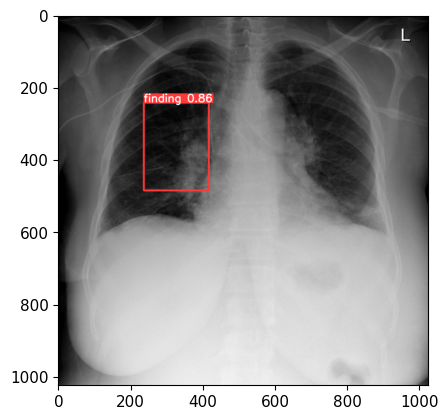

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()